In [17]:
import sys
sys.path.insert(0, "C:/Users/SangY/aiclass/1631036012_SangYub.Ji/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
%matplotlib inline
# pip install pygraphviz

In [18]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

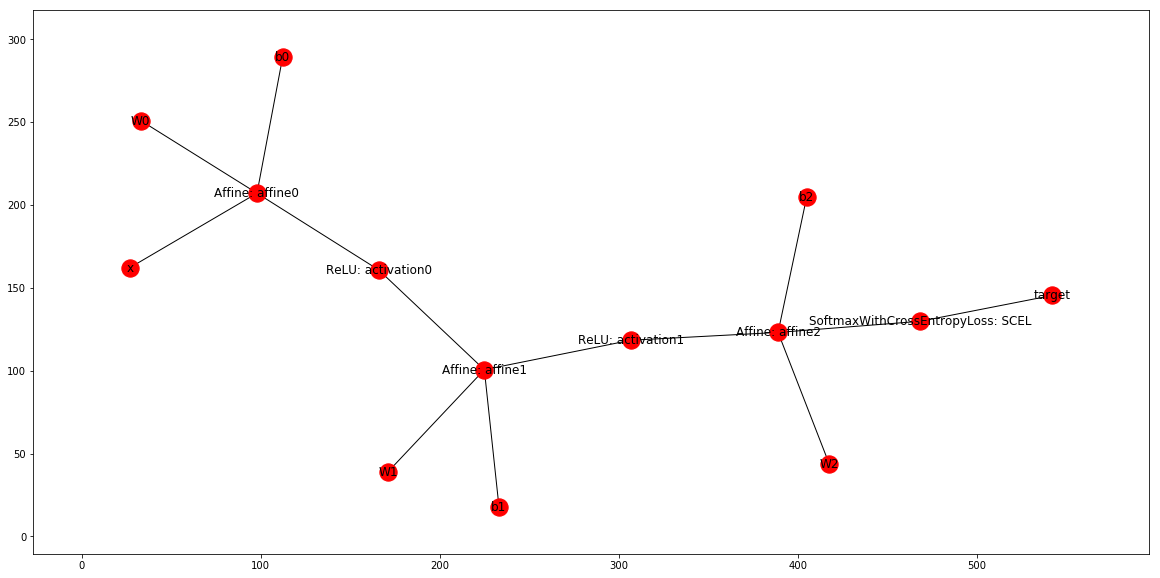

In [19]:
n.draw_and_show(figsize=(20, 10))

In [20]:
#data = mnist.MNIST_Data()
data = mnist.Fashion_MNIST_Data()

In [21]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
n.learning(max_epoch=100, data=data, batch_size=batch_size, print_period=1, verbose=False)

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.0787
Epoch   0 Completed - Train Error: 2.348997 - Validation Error: 2.352324 - Test Accuracy: 0.078700
Epoch   1 Completed - Train Error: 0.719000 - Validation Error: 0.691906 - Test Accuracy: 0.735600
Epoch   2 Completed - Train Error: 0.600929 - Validation Error: 0.589745 - Test Accuracy: 0.769400
Epoch   3 Completed - Train Error: 0.489510 - Validation Error: 0.515499 - Test Accuracy: 0.805200
Epoch   4 Completed - Train Error: 0.513006 - Validation Error: 0.476050 - Test Accuracy: 0.813300
Epoch   5 Completed - Train Error: 0.424912 - Validation Error: 0.468138 - Test Accuracy: 0.818100
Epoch   6 Completed - Train Error: 0.504693 - Validation Error: 0.467268 - Test Accuracy: 0.823800
Epoch   7 Completed - Train Error: 0.386347 - Validation Error: 0.408321 - Test Accuracy: 0.840800
Epoch   8 Completed - Train Error: 0.348941 - Validation Error: 0.398169 - Test Accuracy: 0.845900
Epoch   9 Completed - Train Error: 0.365541 - Validation Error: 0.398622 - Test Accur

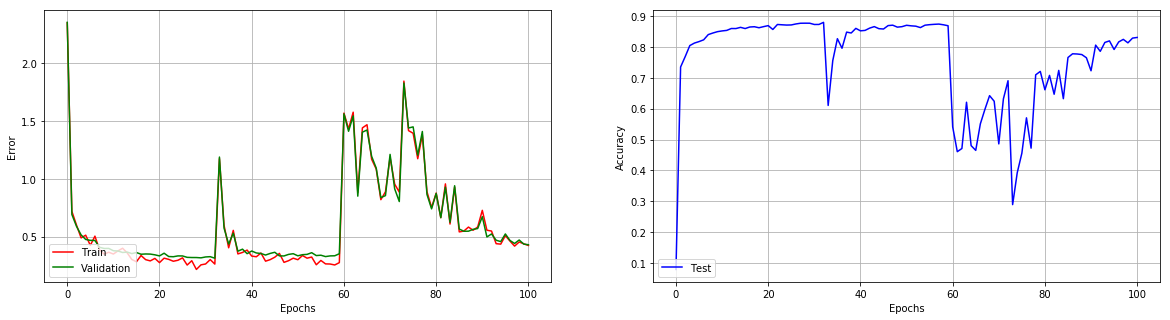

In [22]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 4, Prediction: pullover, Ground Truth: shirt
False Prediction Index: 12, Prediction: sandal, Ground Truth: sneaker
False Prediction Index: 17, Prediction: shirt, Ground Truth: coat
False Prediction Index: 23, Prediction: sandal, Ground Truth: ankle_boots
False Prediction Index: 25, Prediction: pullover, Ground Truth: coat


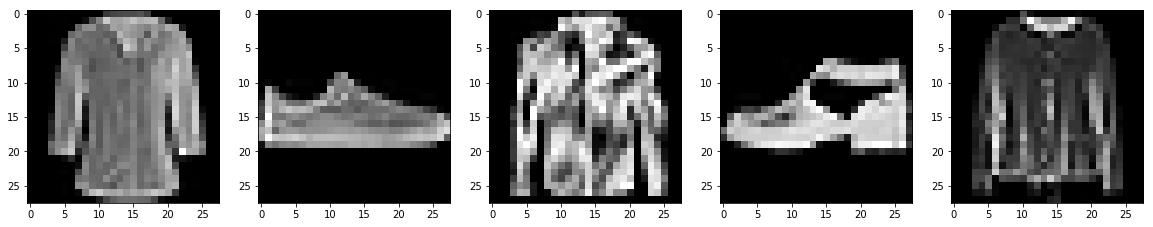

In [23]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

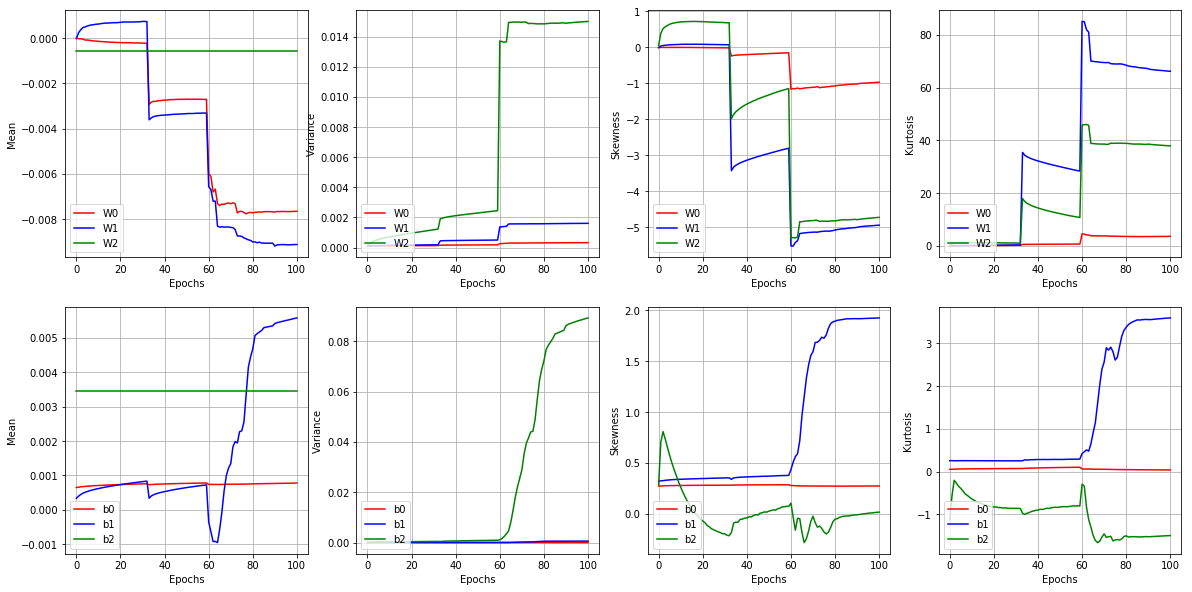

In [24]:
n.draw_param_description(figsize=(20, 10))